# Ideas
* Explain why PCA is not a good choice - not interpretable
* 

In [17]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* idea: label encoders

# Load Data

In [4]:
train = pd.read_csv('../data/census_income_learn.csv', header=None)
test = pd.read_csv('../data/census_income_test.csv')

In [9]:
train.iloc[:,5:7]

,5,6
0,0,Not in universe
1,0,Not in universe
2,0,High school
3,0,Not in universe
4,0,Not in universe
...,...,...
199518,0,Not in universe
199519,0,Not in universe
199520,0,Not in universe
199521,0,High school


# Load feature Names from .txt file using regex

In [138]:
with open('/Users/alexbrostoff/us-census/data/census_income_metadata.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = in_file.read()
features = re.findall('#\d{1,3} \(([^\)]+)\)', lines)
len(features)

40

In [139]:
import re
features = re.findall('#\d{1,3} \(([^\)]+)\)', lines)

In [140]:
len(features)

40

* a feature is missing - check from list 
    * federal income tax liability
        - after dividends, before tax filer status
       
   

In [142]:
train.columns = features[:19] + ['federal income tax'] +\
features[19:] + ['income']



In [143]:
def preprocess(df):
    pass



* so many features - and many of them don't really feel important

# Missing Values

In [144]:
train.isna().sum()

age                                           0
class of worker                               0
detailed industry recode                      0
detailed occupation recode                    0
education                                     0
wage per hour                                 0
enroll in edu inst last wk                    0
marital stat                                  0
major industry code                           0
major occupation code                         0
race                                          0
hispanic origin                               0
sex                                           0
member of a labor union                       0
reason for unemployment                       0
full or part time employment stat             0
capital gains                                 0
capital losses                                0
dividends from stocks                         0
federal income tax                            0
tax filer stat                          

# change value types

In [147]:
train.income.value_counts()

 - 50000.    187141
 50000+.      12382
Name: income, dtype: int64

In [123]:
def display_group_density_plot(df, groupby, on, palette, figsize):
    """
    Displays a density plot by group, given a continuous variable, and a group to split the data by
    :param df: DataFrame to display data from
    :param groupby: Column name by which plots would be grouped (Categorical, maximum 10 categories)
    :param on: Column name of the different density plots
    :param palette: Color palette to use for drawing
    :param figsize: Figure size
    :return: matplotlib.axes._subplots.AxesSubplot object
    """

    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value)

    ax.set_title(str("Distribution of " + on + " per " + groupby + " group"),\
                 fontsize=30)
    
    ax.set_xlabel(on, fontsize=20)
    return ax


No handles with labels found to put in legend.


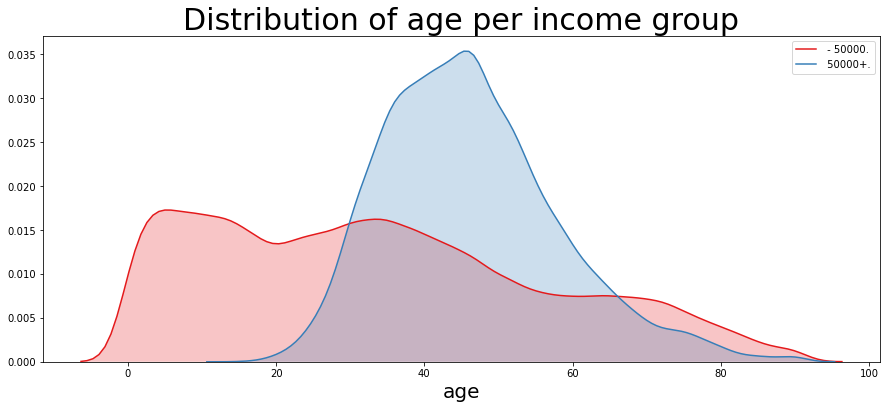

In [148]:
display_group_density_plot(groupby = 'income', \
                           on = 'age', \
                           df = train, \
                           figsize = (15, 6), \
                           palette = sns.color_palette('Set1'));

* Nominal values - check significance using Mutual Information

In [149]:
df.

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,50000
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,50000
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,50000
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,50000


# question - are both parents immigrants?

In [159]:
train.education.value_counts()

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64

In [162]:
train.income.apply(lambda x: x[1])

0         -
1         -
2         -
3         -
4         -
         ..
199518    -
199519    -
199520    -
199521    -
199522    -
Name: income, Length: 199523, dtype: object

In [168]:
train.groupby(['education', 'income']).count()

age  class of worker  \
education                               income                              
 10th grade                              - 50000.   7495             7495   
                                         50000+.      62               62   
 11th grade                              - 50000.   6806             6806   
                                         50000+.      70               70   
 12th grade no diploma                   - 50000.   2092             2092   
                                         50000+.      34               34   
 1st 2nd 3rd or 4th grade                - 50000.   1786             1786   
                                         50000+.      13               13   
 5th or 6th grade                        - 50000.   3255             3255   
                                         50000+.      22               22   
 7th and 8th grade                       - 50000.   7935             7935   
                                         50000+.      72               72   
 9th grade                               - 50000.   6192             6192   
                                         50000+.      38               38   
 Associates degree-academic program      - 50000.   3951             3951   
                                         50000+.     412              412   
 Associates degree-occup /vocational     - 50000.   4945             4945   
                                         50000+.     413              413   
 Bachelors degree(BA AB BS)              - 50000.  15950            15950   
                                         50000+.    3915             3915   
 Children                                - 50000.  47422            47422   
 Doctorate degree(PhD EdD)               - 50000.    606              606   
                                         50000+.     657              657   
 High school graduate                    - 50000.  46528            46528   
                                         50000+.    1879             1879   
 Less than 1st grade                     - 50000.    818              818   
                                         50000+.       1                1   
 Masters degree(MA MS MEng MEd MSW MBA)  - 50000.   4503             4503   
                                         50000+.    2038             2038   
 Prof school degree (MD DDS DVM LLB JD)  - 50000.    824              824   
                                         50000+.     969              969   
 Some college but no degree              - 50000.  26033            26033   
                                         50000+.    1787             1787   

                                                   detailed industry recode  \
education                               income                                
 10th grade                              - 50000.                      7495   
                                         50000+.                         62   
 11th grade                              - 50000.                      6806   
                                         50000+.                         70   
 12th grade no diploma                   - 50000.                      2092   
                                         50000+.                         34   
 1st 2nd 3rd or 4th grade                - 50000.                      1786   
                                         50000+.                         13   
 5th or 6th grade                        - 50000.                      3255   
                                         50000+.                         22   
 7th and 8th grade                       - 50000.                      7935   
                                         50000+.                         72   
 9th grade                               - 50000.                      6192   
                                         50000+.                         38   
 Associates degree-academic program      - 50000.                      3951   
              